In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def plot_function(func, x_range, **kwargs):
    x_values = np.linspace(x_range[0], x_range[1], 100)
    y_values = [func(x, **kwargs) for x in x_values]

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label=f'{func.__name__} graph')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'Graph of {func.__name__}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
def butter_filter(data, cutoff, fs, btype, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    y = lfilter(b, a, data)
    return y

def add_noise(price, x, noise_level=0.02, low_cutoff=0.1, high_cutoff=0.3):
    noise = np.random.normal(0, noise_level, len(x))
    low_pass_noise = butter_filter(noise, low_cutoff, fs=1.0, btype='low')
    high_pass_noise = butter_filter(noise, high_cutoff, fs=1.0, btype='high')
    return price + low_pass_noise + high_pass_noise

#### Price function

$$y=b\left(x\sin\left(\frac{x}{100}\right)\ +\sqrt{\left(x\right)\cdot a}+\left(2\right)^{\frac{\left(\left(x\right)\cdot a-0.5\right)}{10}}-\left(2\right)^{\frac{\left(\left(x\right)\cdot a-9\right)}{9.2}}\right)+c$$

In [26]:
def calculate_price(x, c=400, a=3.7, b=28):
    price = b * (x * np.sin((x / 100)) + 2 * np.sqrt(x * a) + 2 ** ((x * a - 0.5) / 10) - 2 ** ((x * a - 9) / 9.2)) + c
    return price


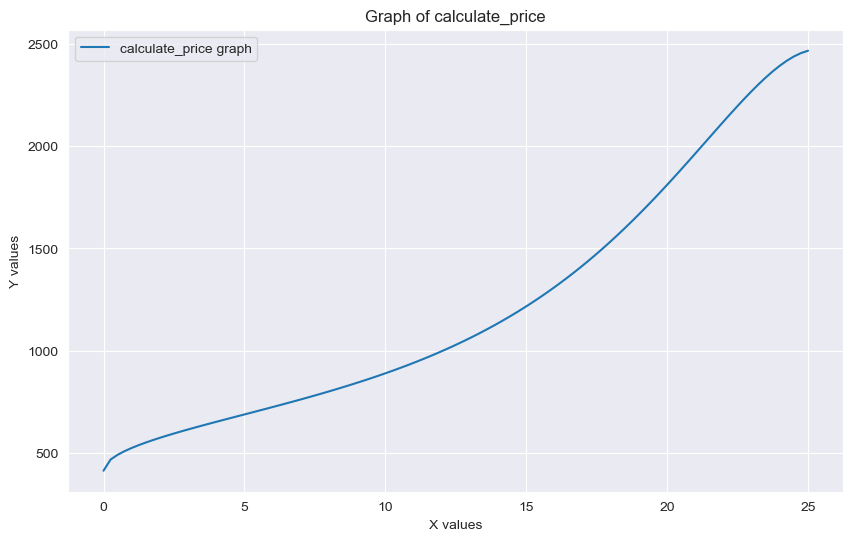

In [45]:
plot_function(calculate_price, x_range=(0, 25))

This document will outline the MDP we would like to implement, with some examples and code to start its implementation. 

# Navigating the housing crisis using a Markov Decision Process

To explain the housing crisis in Eindhoven for international students, we chose to create an MDP that illustrates the process of finding a house within Eindhoven, as an international student. This MDP will start from no knowledge or relation at all to Eindhoven housing agencies, and then move on to include different housing sources, providing different solutions depending on the student.

## Environment

The environment consists of days counting down from 100 to 0, with terminal states representing various house properties (price, comfort, distance). Actions include searching on Facebook, contacting a Realtor, checking with a housing agency and doing nothing. Each action has a cost, a probability of finding a house, and different outcomes in terms of house quality.

### States

- $S = \{100,99, \cdots,  0 \} \cup \{u,d\}$

### Terminal States

- $S_t = \{0, found house\}$

### Actions

- $A=\{Find House,Do Nothing\}$

### Reward Function (R):

reward only on terminal states:
- $\{0\}$ is -100
- $\{found house\}$ is (previous utility * 100) plus some manipulations with days left


### TODO

- Simplify statespace
    
    We definitely need to store states with information about day and utility to make decision anbot accepting or rejecting house

    Simplified with representing u from state as bin $\{0.1,0.2 \hdots 1.0 \}$ or $\{0.05,0.1 \hdots 1.0 \}$ will decide.
    
    We need to define special metric which will be used to calculate how good is the house call it `val` = $f(utility,price)$

    Use Monte Carlo method to estimate mean and variance of `val` distribution to estimate the `val` Z-score during runs.
    

- Reward for each day is a house: house is a tuple of (price, utility).
    Think about this one, without reward we could still just get to state `(0.u | day n)` if we give rewards when it is unnecessary it might ruin overall reward
    the question is do we need to calculate reward based on price and utility? or the relative `val` is enough to calculate the reward. If it is not we better put exact `val` number in reward instead of (price, utility)

- If we accept, we calculate the reward based on price and utility
    Or on the relative `val` or absolute `val` passed in reward
  
- If we reject, we get a penalty of what we currently have (-5, -10,. etc)
    We could define different options to search now it is only one, we need penalty for that to show that it is harder then do nothing

Price is modulated and randomized (making the MDP stochastic) using a low and high pass filter to generate random noise, affecting the price up or down
    Need to think, still dont understand how to affect MDP with filter, since it only change the price of the house and will result in smaller `val` score. This is just worse option to take, but dont provide any stochasticity into MDP.
